In [8]:
import pandas as pd 
import string
import re 
import nltk
import numpy
import time
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from textblob import TextBlob 
from langdetect import detect
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from numpy import mean, std
from scipy.io import loadmat
import pandas as pd 
from sklearn import svm
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
df=pd.read_csv('cleaned_news.csv')

In [10]:
df.head(5)

,text,true
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0


In [11]:
df_text=df['text']

In [12]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1,1), max_features=1000)

text = vectorizer.fit_transform(df_text)
vectorizer.get_feature_names()

['able',
 'absolutely',
 'access',
 'according',
 'account',
 'accused',
 'across',
 'act',
 'action',
 'actions',
 'actually',
 'added',
 'adding',
 'address',
 'administration',
 'adviser',
 'after',
 'again',
 'against',
 'agencies',
 'agency',
 'agenda',
 'ago',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'air',
 'all',
 'allegations',
 'alleged',
 'allies',
 'allow',
 'allowed',
 'almost',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'ambassador',
 'america',
 'american',
 'americans',
 'among',
 'announced',
 'another',
 'any',
 'anyone',
 'anything',
 'apparently',
 'appeared',
 'april',
 'arabia',
 'area',
 'areas',
 'armed',
 'army',
 'around',
 'arrested',
 'article',
 'ask',
 'asked',
 'attack',
 'attacks',
 'attempt',
 'attorney',
 'august',
 'authorities',
 'away',
 'back',
 'bad',
 'ban',
 'bank',
 'barack',
 'base',
 'based',
 'became',
 'because',
 'become',
 'before',
 'began',
 'behind',
 'being',
 'believe',
 'below',
 'bernie',
 'best',
 'better',


In [13]:
X_trainvad, X_test, y_trainvad, y_test = train_test_split(text, df['true'],test_size = 0.3)
X_train, X_vad, y_train, y_vad=train_test_split(X_trainvad,y_trainvad, test_size=0.2)

# hypertuning 

In [ ]:
hyper_parameters = {'C':[0.1,30,60], 'kernel':['linear']}
rs_clf_feat = GridSearchCV(svm.SVC(), param_grid = hyper_parameters, cv=3, scoring='f1', return_train_score = True)
rs_clf_feat.fit(X_train, y_train.ravel())
best_params = rs_clf_feat.best_params_
print('the best hyper parameter:')
print (pd.DataFrame(best_params, index=[0]))
print('the grid_search report:')
pd.DataFrame.from_dict(rs_clf_feat.cv_results_)

# overfitting detection 

In [14]:
clf = svm.SVC (C=100, kernel = 'linear')
classifier = clf.fit(X_train, y_train)
y_pred = classifier.predict(X_vad)
y_pred_train=classifier.predict(X_train)

In [18]:
from sklearn.metrics import f1_score
print('validation f1 score',f1_score(y_vad, y_pred))
print('training f1 score', f1_score(y_train, y_pred_train))

validation f1 score 0.9692513368983958
training f1 score 0.9940275908479139


# testing and testing result 

In [16]:
y_pred_test=classifier.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5245
           1       0.97      0.97      0.97      6332

    accuracy                           0.97     11577
   macro avg       0.97      0.97      0.97     11577
weighted avg       0.97      0.97      0.97     11577



Text(0, 0.5, 'True Label')

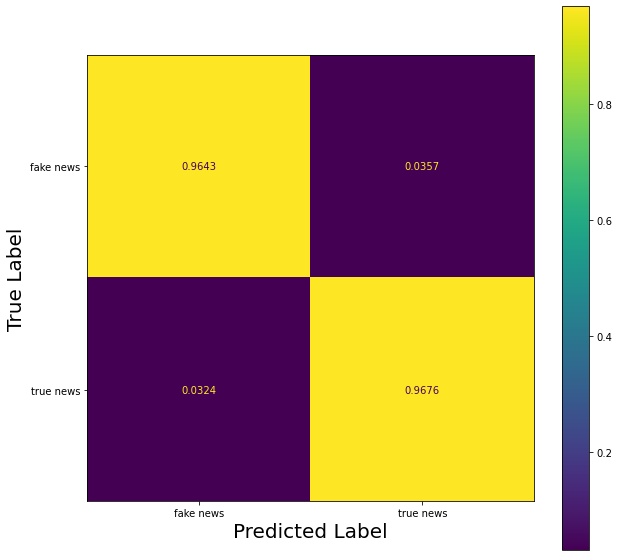

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, normalize = 'true', values_format='.4f',ax=ax, display_labels=['fake news', 'true news'])
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)

# hinge loss

In [20]:
from sklearn.metrics import hinge_loss 
pred_decision = clf.decision_function(X_test)
print(hinge_loss(y_test, pred_decision))

0.10159973505314619
